In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.11.0'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Wed Mar 29 10:45:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.keras.__version__

'2.11.0'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
img.shape

(28, 28)

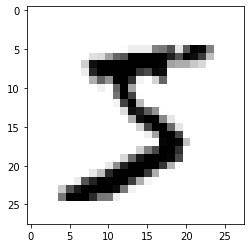

In [14]:
plt.imshow(img, cmap= "binary")

<Axes: >

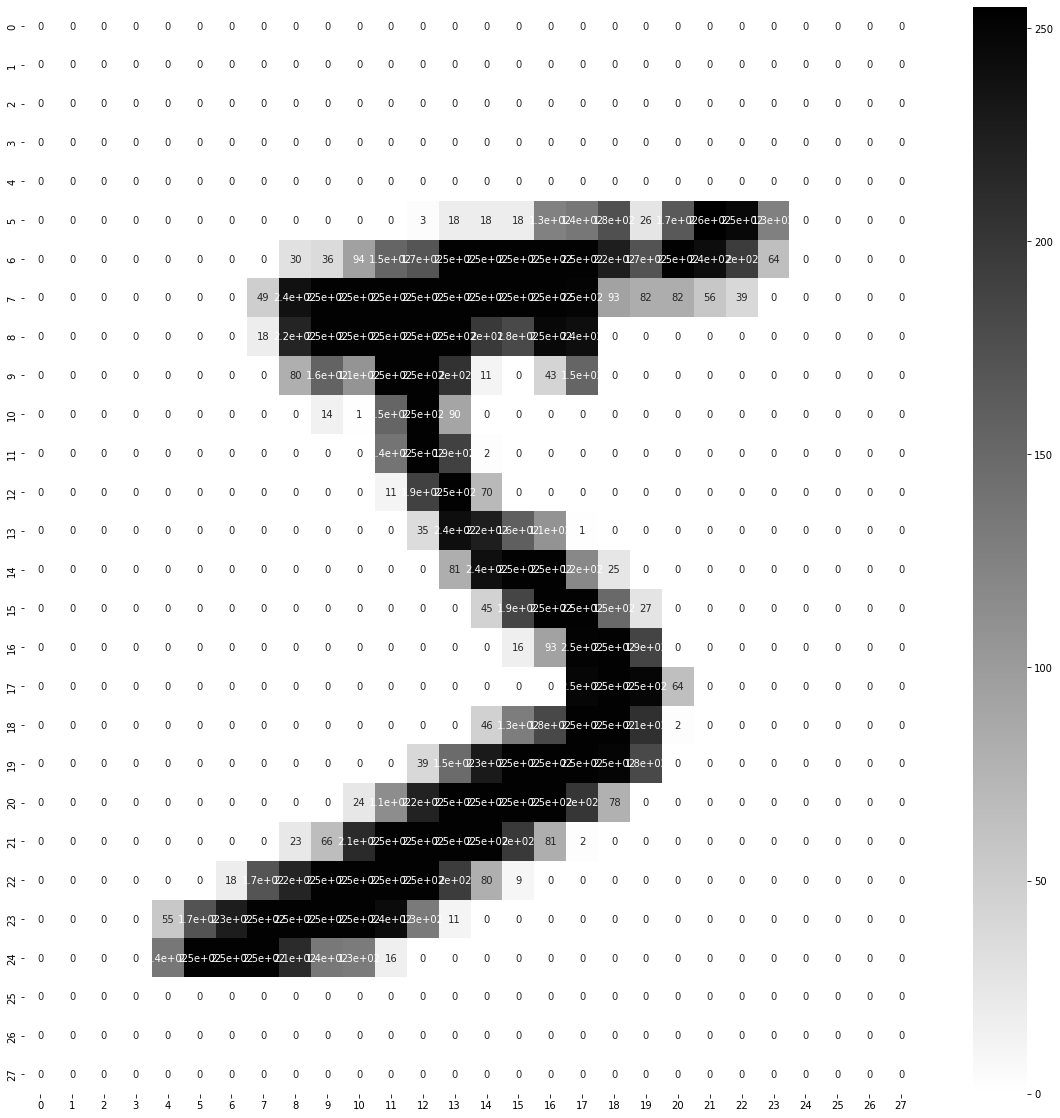

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True, cmap="binary")

<Axes: >

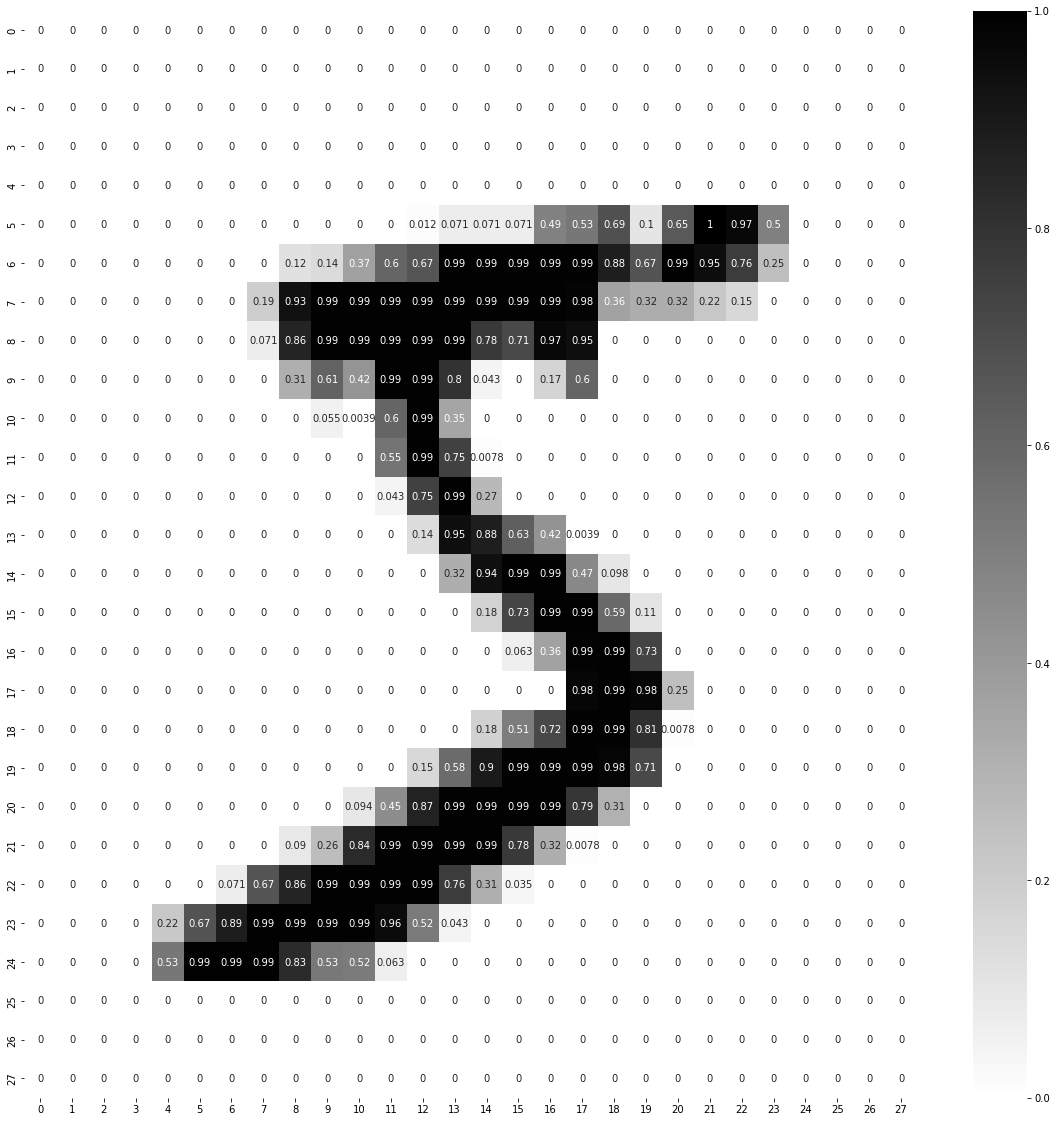

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [17]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



X_test = X_test/255

In [25]:
CLASSES = 10

LAYERS = [
          tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
          tf.keras.layers.Dense(300, activation = "relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation = "relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(CLASSES, activation = "softmax", name="outputLayer"),
]

In [26]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [27]:
model_clf.layers

In [28]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_clf.layers

In [30]:
model_clf.layers[1].name

'hiddenLayer1'

In [31]:
model_clf.layers[1].get_weights()

[array([[ 0.02758715,  0.05481198, -0.0519287 , ..., -0.03968217,
         -0.03509026,  0.06177983],
        [ 0.00672813, -0.01387471, -0.04027121, ..., -0.0346175 ,
         -0.00899084,  0.07321411],
        [ 0.06290542, -0.06234918, -0.05845787, ...,  0.01181314,
         -0.06229931, -0.02827451],
        ...,
        [ 0.01650766,  0.03585052, -0.05555068, ..., -0.05814352,
          0.07288249, -0.05681208],
        [-0.05427512, -0.02711454, -0.0103356 , ..., -0.05940633,
         -0.06536892,  0.04382334],
        [-0.00841427, -0.04409966,  0.05619913, ...,  0.02034317,
          0.00427381,  0.02634623]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [33]:
Weights, biases = model_clf.layers[1].get_weights()

In [34]:
Weights.shape

(784, 300)

In [35]:
biases.shape

(300,)

In [36]:
Weights

array([[ 0.02758715,  0.05481198, -0.0519287 , ..., -0.03968217,
        -0.03509026,  0.06177983],
       [ 0.00672813, -0.01387471, -0.04027121, ..., -0.0346175 ,
        -0.00899084,  0.07321411],
       [ 0.06290542, -0.06234918, -0.05845787, ...,  0.01181314,
        -0.06229931, -0.02827451],
       ...,
       [ 0.01650766,  0.03585052, -0.05555068, ..., -0.05814352,
         0.07288249, -0.05681208],
       [-0.05427512, -0.02711454, -0.0103356 , ..., -0.05940633,
        -0.06536892,  0.04382334],
       [-0.00841427, -0.04409966,  0.05619913, ...,  0.02034317,
         0.00427381,  0.02634623]], dtype=float32)

In [37]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [39]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train,
              epochs = EPOCHS,
              validation_data = VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.6081 - accuracy: 0.8419 - val_loss: 0.3030 - val_accuracy: 0.9202
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.9181 - val_loss: 0.2321 - val_accuracy: 0.9376
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2337 - accuracy: 0.9341 - val_loss: 0.1962 - val_accuracy: 0.9468
Epoch 4/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2000 - accuracy: 0.9429 - val_loss: 0.1728 - val_accuracy: 0.9514
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1749 - accuracy: 0.9504 - val_loss: 0.1561 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1549 - accuracy: 0.9561 - val_loss: 0.1440 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1394 - accuracy: 0.9605 - val_loss: 0.1286 - val_accuracy

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.608053,0.841891,0.303005,0.9202
1,0.285549,0.918145,0.232135,0.9376
2,0.233750,0.934145,0.196185,0.9468
3,0.200023,0.942909,0.172813,0.9514
4,0.174933,0.950364,0.156093,0.9560
5,0.154949,0.956145,0.143994,0.9592
6,0.139437,0.960509,0.128606,0.9666
7,0.125343,0.964400,0.123030,0.9674
8,0.114150,0.968200,0.111061,0.9714
9,0.104725,0.970636,0.105696,0.9724


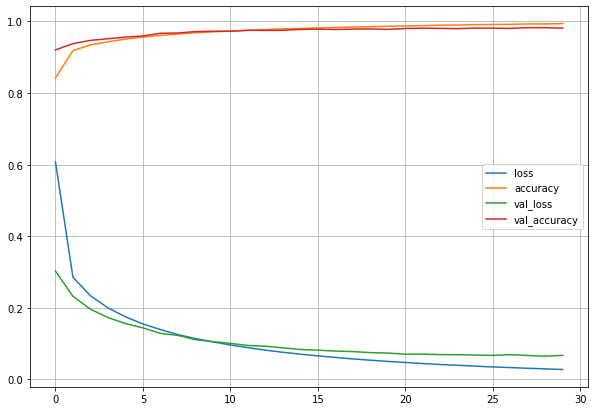

In [45]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [46]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9775


[0.07111036032438278, 0.9775000214576721]

In [47]:
X_test.shape[0]/32

312.5

In [48]:
model_clf.save("test.h5")

In [49]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

1/1 [==============================] - 0s 96ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.001,
        0.   ]], dtype=float32)

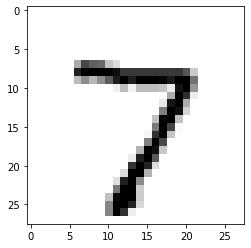

In [50]:
plt.imshow(X_new[0], cmap = "binary")

In [52]:
Y_pred = np.argmax(y_prob, axis = -1)

Y_pred

array([7, 2, 1])

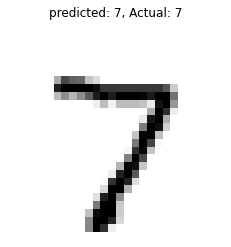

------------------------------------------------------------


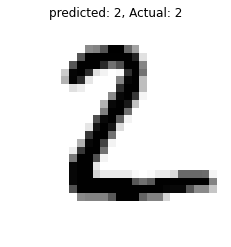

------------------------------------------------------------


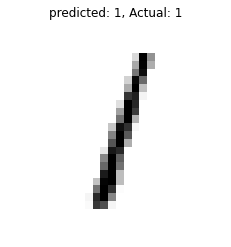

------------------------------------------------------------


In [53]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap = "binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--" * 30)